In [1]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [3]:
# Define the image size and paths to the datasets
IMAGE_SIZE = [224, 224]
train_path = '/Users/harikakakumanu/Downloads/Hair Diseases - Final/train'
test_path = '/Users/harikakakumanu/Downloads/Hair Diseases - Final/test'
val_path = '/Users/harikakakumanu/Downloads/Hair Diseases - Final/val'

# EDA

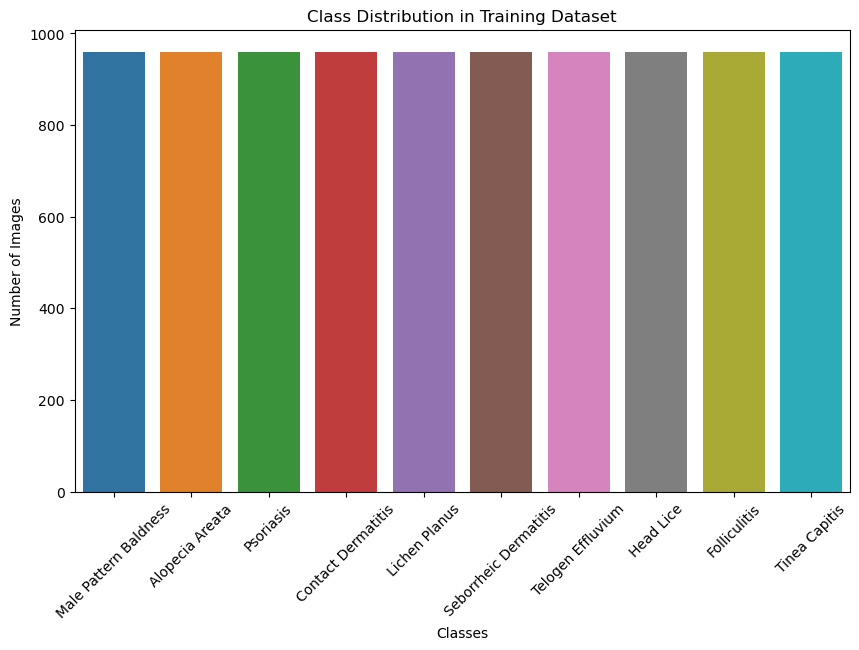

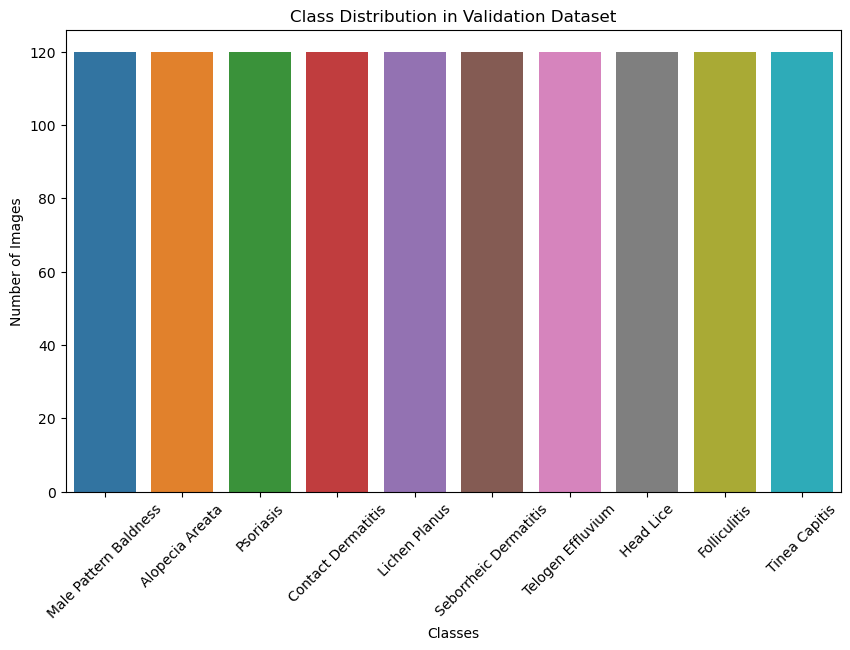

In [10]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns


# Function to get the class distribution in a directory
def get_class_distribution(directory):
    class_distribution = {}
    try:
        for class_folder in os.listdir(directory):
            class_path = os.path.join(directory, class_folder)
            if os.path.isdir(class_path):
                class_distribution[class_folder] = len(os.listdir(class_path))
    except Exception as e:
        print(f"Error: {e}")
    return class_distribution

# Plot class distribution in training dataset
train_class_distribution = get_class_distribution(train_path)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(train_class_distribution.keys()), y=list(train_class_distribution.values()))
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

# Plot class distribution in validation dataset
val_class_distribution = get_class_distribution(val_path)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(val_class_distribution.keys()), y=list(val_class_distribution.values()))
plt.title('Class Distribution in Validation Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


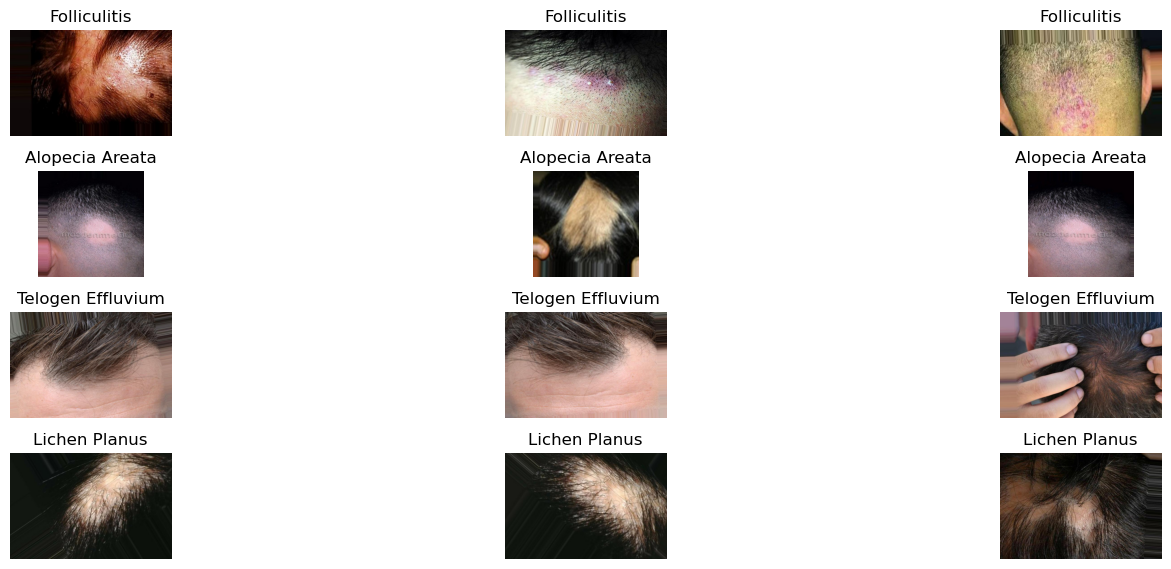

In [81]:
import random

# Function to display sample images from a directory
def display_sample_images(directory, num_images_per_class=3, num_classes_to_display=5):
    plt.figure(figsize=(15, 7))
    classes = os.listdir(directory)
    classes_to_display = random.sample(classes, min(num_classes_to_display, len(classes)))
    
    for i, class_folder in enumerate(classes_to_display):
        class_path = os.path.join(directory, class_folder)
        if os.path.isdir(class_path):
            image_files = random.sample(os.listdir(class_path), min(num_images_per_class, len(os.listdir(class_path))))
            for j, image_file in enumerate(image_files):
                img_path = os.path.join(class_path, image_file)
                img = plt.imread(img_path)
                plt.subplot(num_classes_to_display, num_images_per_class, i * num_images_per_class + j + 1)
                plt.imshow(img)
                plt.title(class_folder)
                plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images from training dataset
display_sample_images(train_path, num_images_per_class=3, num_classes_to_display=5)


# MODEL 1: MobileNetV2 model

In [16]:
# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [17]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [18]:
# Define your classes
classes = [
    'Alopecia Areata', 'Contact Dermatitis', 'Folliculitis', 'Head Lice',
    'Lichen Planus', 'Male Pattern Baldness', 'Psoriasis', 'Seborrheic Dermatitis',
    'Telogen Effluvium', 'Tinea Capitis'
]

In [19]:
# Add custom top layers for our classification task
x = Flatten()(base_model.output)
prediction_layer = Dense(len(classes), activation='softmax')(x)
# Create model
model = Model(inputs=base_model.input, outputs=prediction_layer)

In [26]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,885,194 (11.01 MB)

 Trainable params: 627,210 (2.39 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# Data Augmentation and Image Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # Randomly shift images vertically (fraction of total height)
    shear_range=0.1,        # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.1,         # Randomly zoom image
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=True,     # Randomly flip images vertically
    fill_mode='nearest'     # Strategy used for filling in newly created pixels
)

# Generate augmented batches of training data
training_set = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

# Generate batches of augmented data for testing
test_set = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Generate batches of augmented data for validation
val_set = val_datagen.flow_from_directory(
    directory=val_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Alternatively, you can define generators directly for train, test, and validation sets
train_generator = train_datagen.flow_from_directory(train_path, target_size=IMAGE_SIZE, batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=IMAGE_SIZE, batch_size=32, class_mode='categorical', shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path, target_size=IMAGE_SIZE, batch_size=32, class_mode='categorical')

Found 9600 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 9600 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [30]:
# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=20)

Epoch 1/20


/Users/harikakakumanu/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 90s 291ms/step - accuracy: 0.6347 - loss: 4.4188 - val_accuracy: 0.8633 - val_loss: 1.2424
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 89s 293ms/step - accuracy: 0.8765 - loss: 1.1535 - val_accuracy: 0.8992 - val_loss: 1.2686
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 91s 296ms/step - accuracy: 0.9143 - loss: 0.9739 - val_accuracy: 0.9458 - val_loss: 0.5827
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 91s 298ms/step - accuracy: 0.9379 - loss: 0.7045 - val_accuracy: 0.9300 - val_loss: 0.9572
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 184s 610ms/step - accuracy: 0.9436 - loss: 0.6518 - val_accuracy: 0.9558 - val_loss: 0.5208
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 92s 300ms/step - accuracy: 0.9491 - loss: 0.6796 - val_accuracy: 0.9667 - val_loss: 0.4891
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 99s 324ms/step - accuracy: 0.9523 - loss: 0.7414 - val_accuracy: 0.9775 - val_loss: 0.3089
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 112s 367ms/step - accuracy: 0.9579 - loss: 0.6517 - v

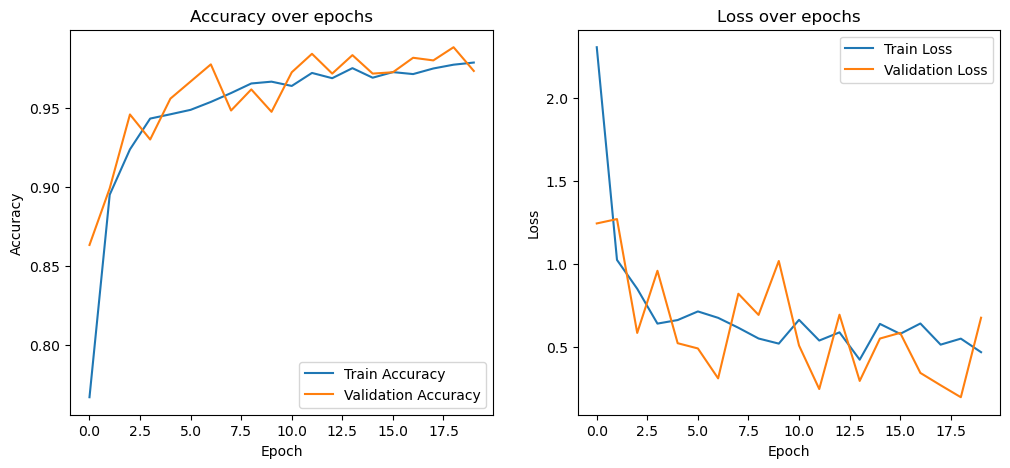

In [31]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [32]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)


38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - accuracy: 0.9923 - loss: 0.1577
Test accuracy: 0.9816666841506958


In [40]:
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtain true labels from the test generator
y_true = test_generator.classes

# Generate classification report
classification_rep = classification_report(y_true, y_pred_classes, target_names=classes)
print(classification_rep)


38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step
                       precision    recall  f1-score   support

      Alopecia Areata       0.94      1.00      0.97       120
   Contact Dermatitis       1.00      1.00      1.00       120
         Folliculitis       0.99      0.99      0.99       120
            Head Lice       1.00      0.98      0.99       120
        Lichen Planus       1.00      0.97      0.99       120
Male Pattern Baldness       1.00      1.00      1.00       120
            Psoriasis       0.94      0.99      0.97       120
Seborrheic Dermatitis       0.95      0.99      0.97       120
    Telogen Effluvium       1.00      0.94      0.97       120
        Tinea Capitis       1.00      0.94      0.97       120

             accuracy                           0.98      1200
            macro avg       0.98      0.98      0.98      1200
         weighted avg       0.98      0.98      0.98      1200



In [34]:
# Obtain true labels from the test generator
y_true = test_generator.classes

In [35]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

In [36]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=None, normalize=False):
    import itertools
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:.2f}".format(cm[i, j]) if normalize else "{:,}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

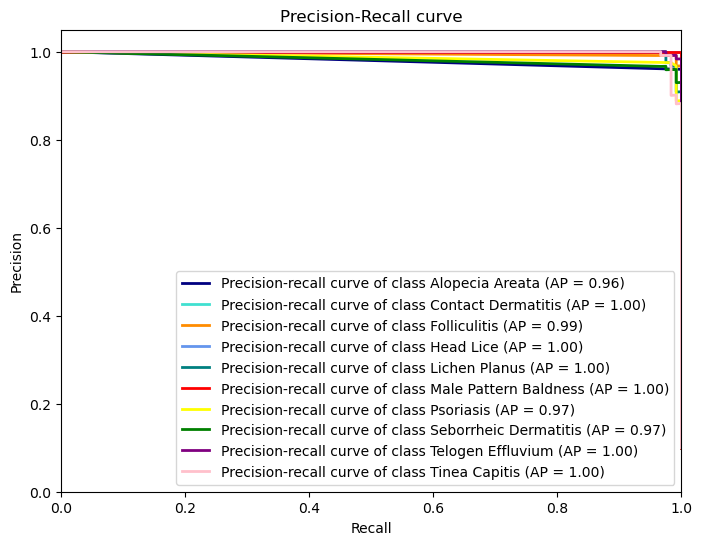

In [37]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(y_true, y_pred, classes):
    # Compute precision and recall for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(classes)):
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, y_pred[:, i])
        average_precision[i] = average_precision_score(y_true == i, y_pred[:, i])

    # Plot precision-recall curve for each class
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'purple', 'pink']
    for i, color in zip(range(len(classes)), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label=f'Precision-recall curve of class {classes[i]} (AP = {average_precision[i]:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot precision-recall curve
plot_precision_recall_curve(y_true, y_pred, classes)


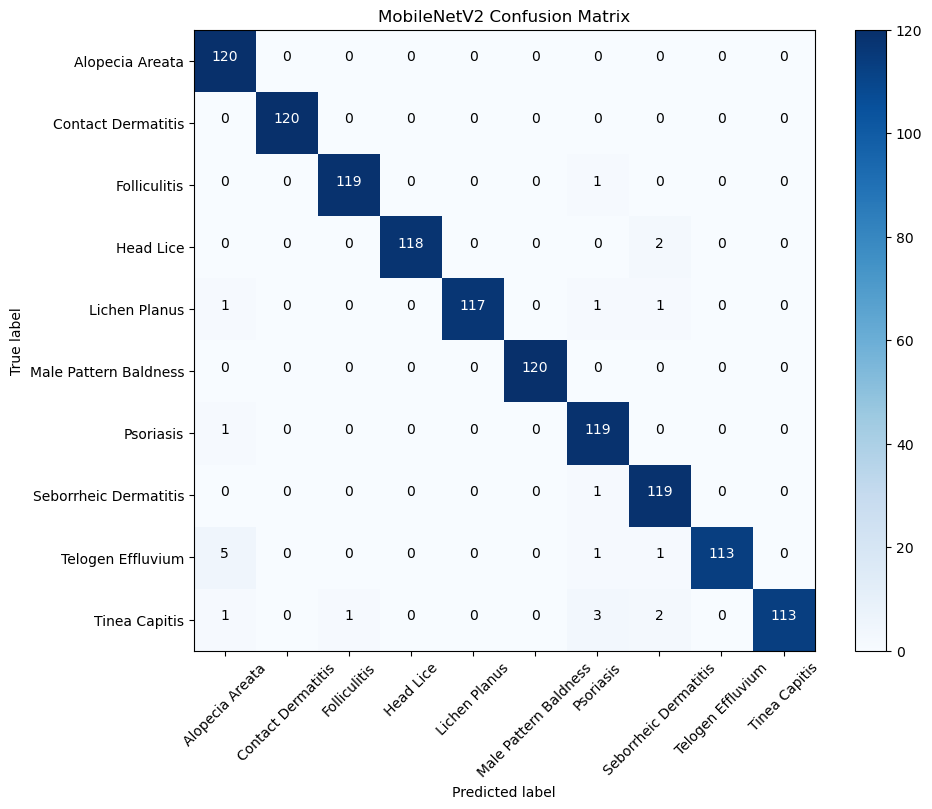

In [39]:
# Plot the confusion matrix
plot_confusion_matrix(cm=conf_matrix, target_names=classes, title='MobileNetV2 Confusion Matrix', normalize=False)



# MODEL2 : InceptionV3 model

In [55]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


# Define a function to adjust learning rate during training
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr *= 0.1
    return lr

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Add custom top layers for classification
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
prediction_layer = Dense(len(classes), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=prediction_layer)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and custom learning rate
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_379 (Conv2D) │ (None, 111, 111,  │        864 │ input_layer_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_379[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_376      │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_380 (Conv2D) │ (None, 109, 109,  │      9,216 │ activation_376[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_380[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_377      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_381 (Conv2D) │ (None, 109, 109,  │     18,432 │ activation_377[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_381[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_378      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 54, 54,    │          0 │ activation_378[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_382 (Conv2D) │ (None, 54, 54,    │      5,120 │ max_pooling2d_19… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_382[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_379      │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_383 (Conv2D) │ (None, 52, 52,    │    138,240 │ activation_379[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_383[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_380      │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 48,022,826 (183.19 MB)

 Trainable params: 26,220,042 (100.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [56]:


# Compile the model with Adam optimizer and the specified learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for learning rate scheduling
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with data augmentation and learning rate scheduling
history = model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[lr_scheduler])


# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)




Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - accuracy: 0.2698 - loss: 8.1084 - val_accuracy: 0.5075 - val_loss: 1.4796 - learning_rate: 0.0010
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 507s 2s/step - accuracy: 0.3724 - loss: 1.7239 - val_accuracy: 0.5767 - val_loss: 1.2835 - learning_rate: 0.0010
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 497s 2s/step - accuracy: 0.4127 - loss: 1.5636 - val_accuracy: 0.7008 - val_loss: 0.9620 - learning_rate: 0.0010
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 1541s 5s/step - accuracy: 0.4430 - loss: 1.4822 - val_accuracy: 0.7408 - val_loss: 0.7734 - learning_rate: 0.0010
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 2470s 8s/step - accuracy: 0.4918 - loss: 1.3582 - val_accuracy: 0.7783 - val_loss: 0.7338 - learning_rate: 0.0010
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - accuracy: 0.5052 - loss: 1.3216 - val_accuracy: 0.8100 - val_loss: 0.6887 - learning_rate: 0.0010
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 750s 2s/step - accuracy: 0.5359 - loss: 

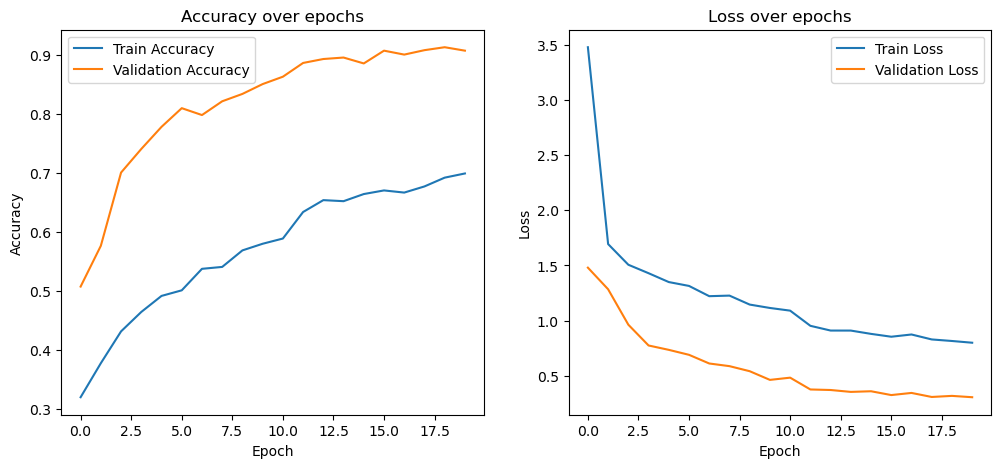

In [57]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [58]:
from sklearn.metrics import classification_report

# Generate predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtain true labels from the test generator
y_true = test_generator.classes

# Generate classification report
classification_rep = classification_report(y_true, y_pred_classes, target_names=classes)
print(classification_rep)


38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 551ms/step
                       precision    recall  f1-score   support

      Alopecia Areata       0.98      0.89      0.93       120
   Contact Dermatitis       0.98      0.99      0.99       120
         Folliculitis       0.95      0.99      0.97       120
            Head Lice       0.97      0.97      0.97       120
        Lichen Planus       0.95      0.88      0.91       120
Male Pattern Baldness       0.98      0.97      0.98       120
            Psoriasis       0.67      0.89      0.77       120
Seborrheic Dermatitis       0.94      0.75      0.83       120
    Telogen Effluvium       0.89      0.96      0.92       120
        Tinea Capitis       0.79      0.72      0.76       120

             accuracy                           0.90      1200
            macro avg       0.91      0.90      0.90      1200
         weighted avg       0.91      0.90      0.90      1200



In [59]:
# Obtain true labels from the test generator
y_true = test_generator.classes

In [60]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

In [82]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=None, normalize=False):
    import itertools
    if cmap is None:
        cmap = plt.get_cmap('Oranges')
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:.2f}".format(cm[i, j]) if normalize else "{:,}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

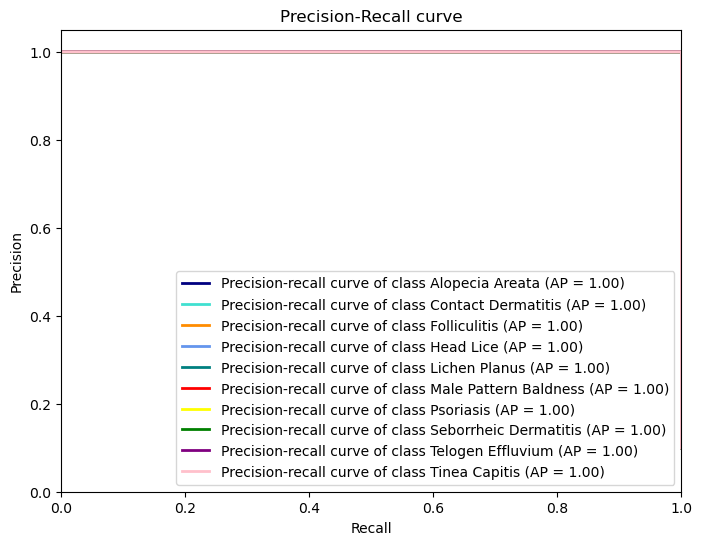

In [83]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(y_true, y_pred, classes):
    # Compute precision and recall for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(classes)):
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, y_pred[:, i])
        average_precision[i] = average_precision_score(y_true == i, y_pred[:, i])

    # Plot precision-recall curve for each class
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'purple', 'pink']
    for i, color in zip(range(len(classes)), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label=f'Precision-recall curve of class {classes[i]} (AP = {average_precision[i]:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot precision-recall curve
plot_precision_recall_curve(y_true, y_pred, classes)


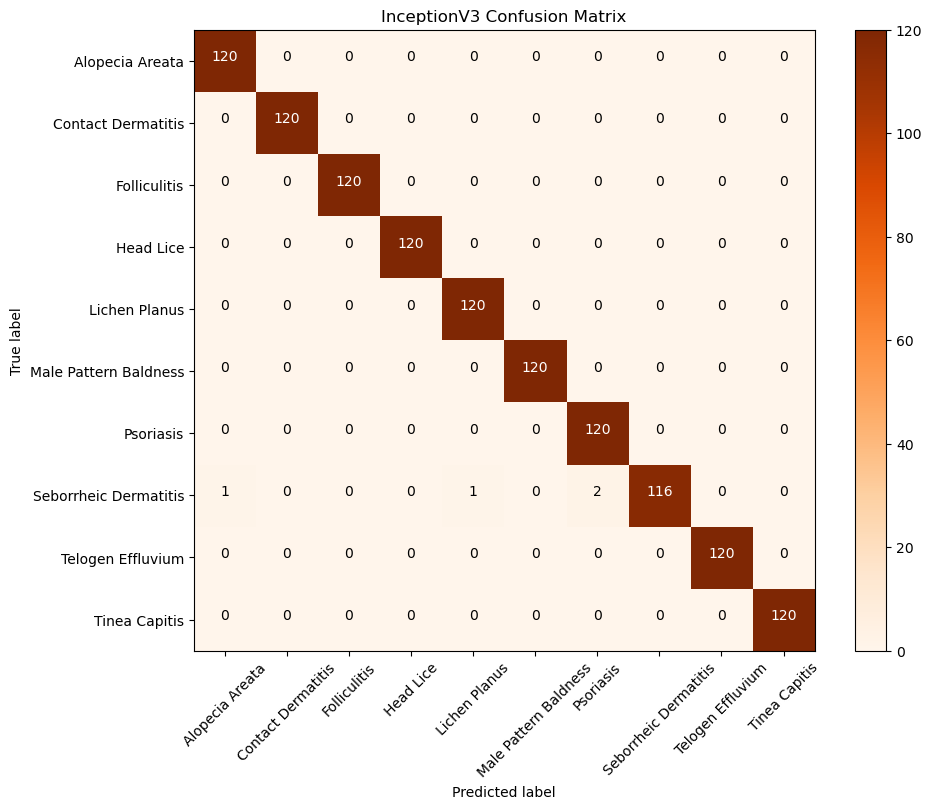

In [84]:
# Plot the confusion matrix
plot_confusion_matrix(cm=conf_matrix, target_names=classes, title='InceptionV3 Confusion Matrix', normalize=False)



# MODEL3 : DenseNet169 model

In [64]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report

# Define a function to adjust learning rate during training
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr *= 0.1
    return lr

# Load the pre-trained DenseNet169 model
base_model = DenseNet169(weights='imagenet', include_top=False)

# Add custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(classes), activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and custom learning rate
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for learning rate scheduling
lr_scheduler = LearningRateScheduler(lr_schedule)

model.summary()



Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, None,      │          0 │ input_layer_8[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,408 │ zero_padding2d[0… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, None,      │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, None,      │          0 │ conv2_block1_0_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, None,      │          0 │ pool1[0][0],      │
│ (Concatenate)       │ None, 96)         │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, None,      │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, None,      │          0 │ conv2_block2_0_b… │
│ (Activation)        │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, None,      │     12,288 │ conv2_block2_0_r

 Total params: 13,500,490 (51.50 MB)

 Trainable params: 857,610 (3.27 MB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [65]:
# Train the model with data augmentation and learning rate scheduling
history = model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[lr_scheduler])



Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.4825 - loss: 1.5623 - val_accuracy: 0.8767 - val_loss: 0.4467 - learning_rate: 0.0010
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.8402 - loss: 0.4807 - val_accuracy: 0.9375 - val_loss: 0.2055 - learning_rate: 0.0010
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 373s 1s/step - accuracy: 0.9082 - loss: 0.2831 - val_accuracy: 0.9750 - val_loss: 0.0987 - learning_rate: 0.0010
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 914s 3s/step - accuracy: 0.9408 - loss: 0.1986 - val_accuracy: 0.9825 - val_loss: 0.0736 - learning_rate: 0.0010
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.9472 - loss: 0.1590 - val_accuracy: 0.9858 - val_loss: 0.0578 - learning_rate: 0.0010
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 834s 3s/step - accuracy: 0.9481 - loss: 0.1519 - val_accuracy: 0.9850 - val_loss: 0.0539 - learning_rate: 0.0010
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 780s 3s/step - accuracy: 0.9606 - loss: 0.

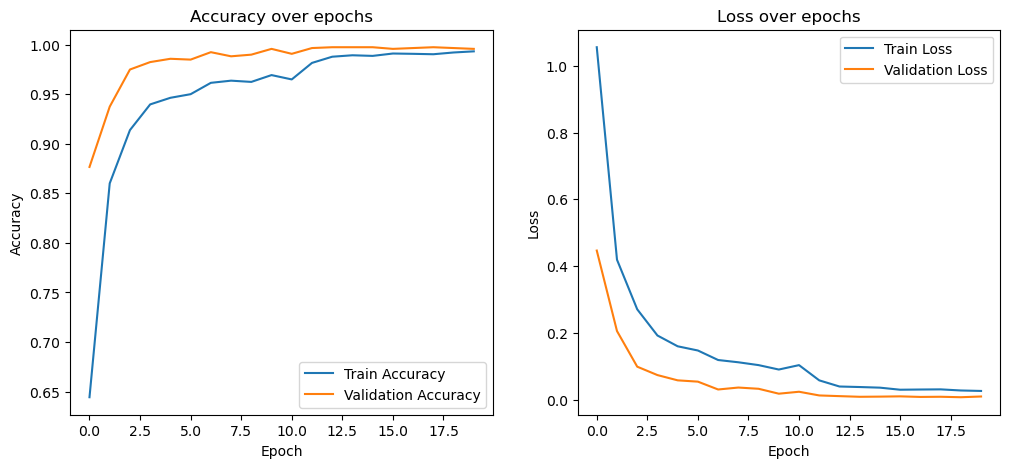

In [66]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [67]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

# Predict labels for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the test generator
y_true = test_generator.classes

# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=classes)
print(class_report)


38/38 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9989 - loss: 0.0033
Test accuracy: 0.996666669845581
38/38 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step
                       precision    recall  f1-score   support

      Alopecia Areata       0.99      1.00      1.00       120
   Contact Dermatitis       1.00      1.00      1.00       120
         Folliculitis       1.00      1.00      1.00       120
            Head Lice       1.00      1.00      1.00       120
        Lichen Planus       0.99      1.00      1.00       120
Male Pattern Baldness       1.00      1.00      1.00       120
            Psoriasis       0.98      1.00      0.99       120
Seborrheic Dermatitis       1.00      0.97      0.98       120
    Telogen Effluvium       1.00      1.00      1.00       120
        Tinea Capitis       1.00      1.00      1.00       120

             accuracy                           1.00      1200
            macro avg       1.00      1.00      1.00      1200
         weighted avg       1.00  

In [68]:
# Obtain true labels from the test generator
y_true = test_generator.classes

In [69]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

In [70]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=None, normalize=False):
    import itertools
    if cmap is None:
        cmap = plt.get_cmap('Greens')
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:.2f}".format(cm[i, j]) if normalize else "{:,}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

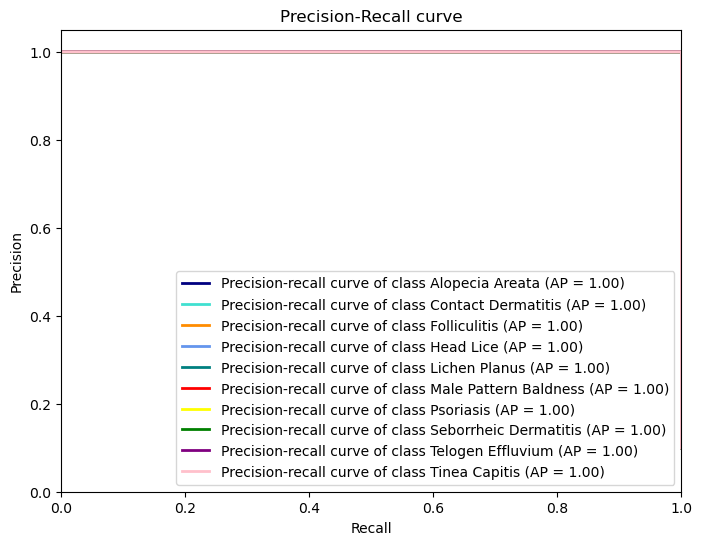

In [71]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(y_true, y_pred, classes):
    # Compute precision and recall for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(classes)):
        precision[i], recall[i], _ = precision_recall_curve(y_true == i, y_pred[:, i])
        average_precision[i] = average_precision_score(y_true == i, y_pred[:, i])

    # Plot precision-recall curve for each class
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'purple', 'pink']
    for i, color in zip(range(len(classes)), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label=f'Precision-recall curve of class {classes[i]} (AP = {average_precision[i]:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot precision-recall curve
plot_precision_recall_curve(y_true, y_pred, classes)


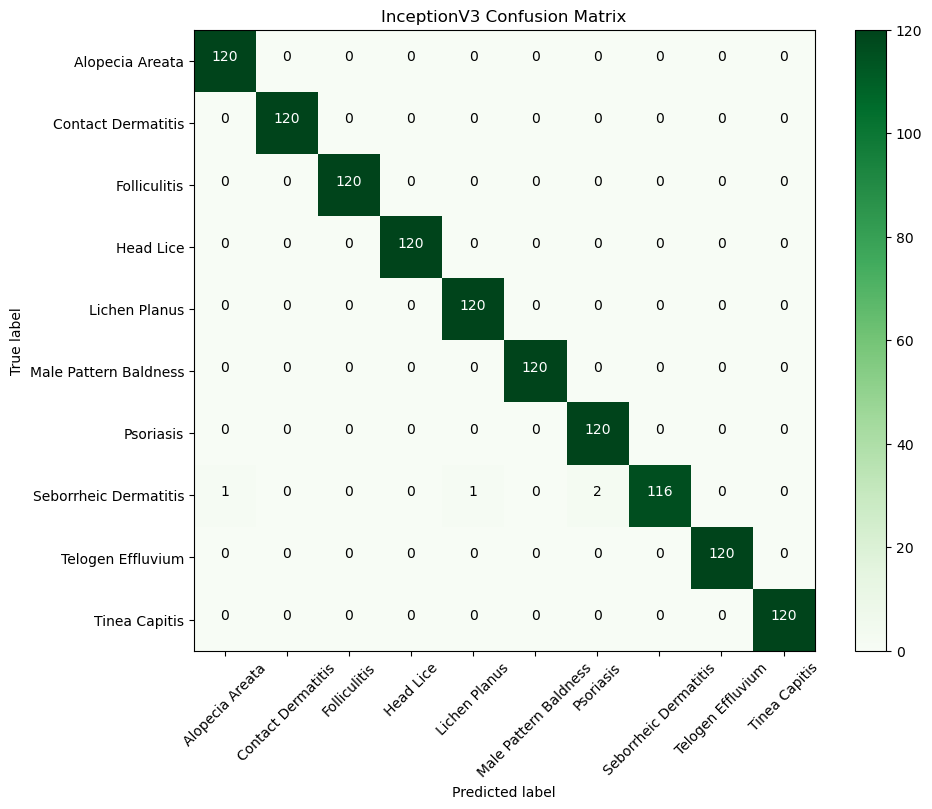

In [72]:
# Plot the confusion matrix
plot_confusion_matrix(cm=conf_matrix, target_names=classes, title='DenseNet169 Confusion Matrix', normalize=False)

